## WebAd. Optimization using Reinforcement Learning - Upper Confidence Bound

Click here...[dataset](https://github.com/thisarakaushan/Machine-Learning-Bootcamp/blob/main/datasets/Ads_CTR_Optimisation.csv)

* ```Upper Confidence Bound``` - It is a deterministic algorithm, there is no factor of uncertainty or probability.
Reinforcemnet Learning that focuses on exploration and exploitation based on a confidence boundary that the algorithm assigns to each thing on each round of exploration.


* Each thing is assumed to have a uniform Cofidence Interval and a success distribution.
* This Confidence Interval is a margin of success rate distributions which is the most certain to consist of the actual success rate distribution of each thing which we are unaware of the beginning.
* A result is randomly chosen to study as initially, they have all the same confidence intervals.
* Based on whether the result gave a reward or not, the Confidence Interval shifts either towards or away from the actual success distribution and the also converges or shrinks as it has been explored thus resulting in the Upper Bound value of the confidence Interval to also be reduced.
* Based on the current Upper Confidence Bounds of each result, the one with the highest is chosen to explore in the next round.
* Steps 3 and 4 are continued until there are sufficient observations to determine the upper confidence bound of each result. The one with the highest upper confidence bound is the result with the highest success rate.

### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import dataset from local directory

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
dataset.shape

(10000, 10)

In [4]:
dataset.head(5)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


### Implementing Upper Confidence Bound

In [5]:
import math

obseravations = 10000
no_of_Ads = 10
ads_selected = []
numbers_of_selections_of_each_ads = [0] * no_of_Ads
sums_of_rewards_of_each_ads = [0] * no_of_Ads
total_reward = 0
for n in range(0, obseravations):
    ad = 0
    max_upper_bound = 0
    for i in range(0, no_of_Ads):
        if (numbers_of_selections_of_each_ads[i] > 0):
            average_reward = sums_of_rewards_of_each_ads[i] / numbers_of_selections_of_each_ads[i]
            # confidence interval
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections_of_each_ads[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections_of_each_ads[ad] = numbers_of_selections_of_each_ads[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards_of_each_ads[ad] = sums_of_rewards_of_each_ads[ad] + reward
    total_reward = total_reward + reward
    
print("Rewards by Ads = ", sums_of_rewards_of_each_ads)

Rewards by Ads =  [120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]


In [6]:
print("Total Rewards by USB = ", total_reward)

Total Rewards by USB =  2178


In [7]:
print("Ads selected at each round: ", ads_selected)

Ads selected at each round:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6, 7, 7, 7, 0, 6, 7, 4, 1, 1, 1, 2, 2, 2, 3, 5, 9, 2, 8, 7, 0, 1, 6, 4, 7, 2, 8

### Visualising the results

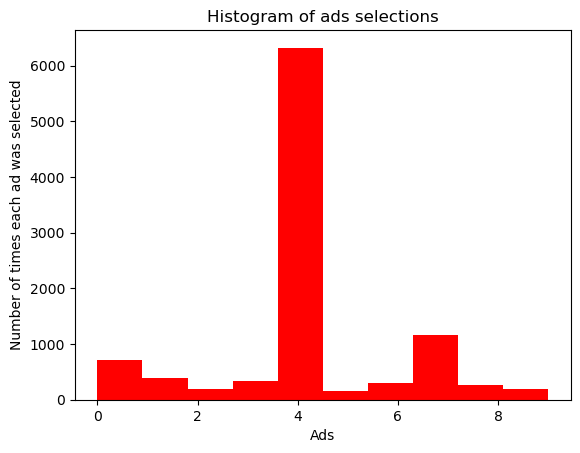

In [8]:
plt.hist(ads_selected, color = 'red')
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

### Implementing Thompson sampling

In [9]:
import random

obseravations = 10000
no_of_Ads = 10
ads_selected = []
numbers_of_selections_of_each_ads = [0] * no_of_Ads
sums_of_rewards_of_each_ads = [0] * no_of_Ads
total_reward = 0
for n in range(0, obseravations):
    ad = 0
    max_random = 0
    for i in range(0, no_of_Ads):
        random_beta = random.betavariate(numbers_of_selections_of_each_ads[i] + 1, sums_of_rewards_of_each_ads[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    numbers_of_selections_of_each_ads[ad] = numbers_of_selections_of_each_ads[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards_of_each_ads[ad] = sums_of_rewards_of_each_ads[ad] + reward
    total_reward = total_reward + reward
    
print("Rewards by Ads = ", sums_of_rewards_of_each_ads)

Rewards by Ads =  [3, 2, 4, 3, 2, 119, 2, 2, 3, 6]


In [10]:
print("Total Rewards = ", total_reward)

Total Rewards =  146


In [11]:
print("Ads selected at each round: ", ads_selected)

Ads selected at each round:  [9, 2, 2, 2, 2, 9, 6, 5, 8, 2, 6, 3, 9, 0, 9, 1, 4, 9, 1, 8, 1, 8, 9, 2, 6, 7, 0, 9, 9, 5, 0, 4, 5, 6, 4, 7, 4, 5, 9, 3, 9, 7, 3, 5, 2, 4, 9, 9, 1, 4, 9, 9, 9, 8, 9, 3, 9, 9, 9, 9, 9, 9, 9, 5, 9, 9, 5, 9, 3, 3, 9, 3, 3, 9, 9, 9, 9, 9, 5, 3, 5, 9, 5, 9, 9, 5, 6, 9, 5, 9, 9, 9, 3, 9, 3, 9, 9, 9, 5, 9, 9, 9, 3, 5, 5, 2, 9, 9, 9, 9, 9, 5, 9, 9, 5, 9, 9, 5, 9, 9, 9, 5, 5, 5, 5, 6, 9, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 5, 9, 9, 9, 9, 5, 9, 9, 5, 5, 9, 3, 5, 9, 9, 9, 9, 9, 9, 9, 3, 9, 9, 5, 9, 0, 9, 9, 9, 9, 9, 5, 9, 9, 9, 5, 9, 5, 9, 5, 5, 9, 0, 9, 5, 5, 5, 5, 9, 9, 9, 9, 2, 9, 9, 9, 9, 9, 5, 5, 9, 9, 5, 5, 9, 5, 5, 5, 9, 9, 9, 5, 5, 5, 5, 5, 5, 9, 5, 9, 5, 5, 5, 5, 5, 5, 9, 5, 9, 9, 5, 5, 5, 5, 9, 3, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 9, 5, 9, 5, 5, 9, 9, 5, 5, 5, 5, 5, 5, 9, 9, 9, 5, 9, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 9, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5

### Visualising the results

Text(0, 0.5, 'Number of times each ad was selected')

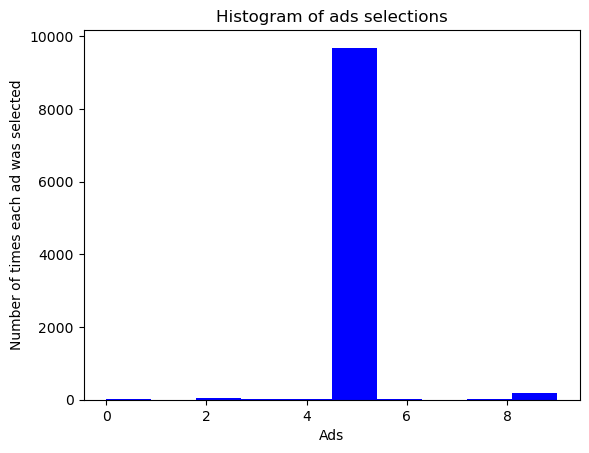

In [12]:
plt.hist(ads_selected, color = 'blue')
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')